冯汇然, 12231095, Assignment 04, Due: 12/06 19：00

# 1. Global Earthquakes
In this problem set, we will use [this file](https://zhu-group.github.io/ese5023/download/usgs_earthquakes.csv) from the USGS Earthquakes Database. The dataset is similar to the one you use in [Assignment 02](https://zhu-group.github.io/ese5023/Assignment_02.html#1_Significant_earthquakes_since_2150_BC). Use the file provided (`usgs_earthquakes.csv`) to recreate the following map. Use the mag column for magnitude. **[10 points]**
![1.png](https://zhu-group.github.io/ese5023/figs/earthquakes.png)

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
earthquakes = pd.read_csv('usgs_earthquakes.csv')[['mag','latitude','longitude']].sort_values(by='mag',ascending=0)[:50]
earthquakes.head(10)

,mag,latitude,longitude
37371,8.2,-19.6097,-70.7691
50562,7.9,51.8486,178.7352
36918,7.7,-20.5709,-70.4931
33808,7.6,-11.2701,162.1481
31496,7.5,-6.7547,155.0241
33537,7.4,-11.4633,162.0511
95913,7.3,12.5262,-88.1225
31850,7.2,17.3970,-100.9723
34318,7.1,-6.5858,155.0485
106285,7.1,1.8929,126.5217


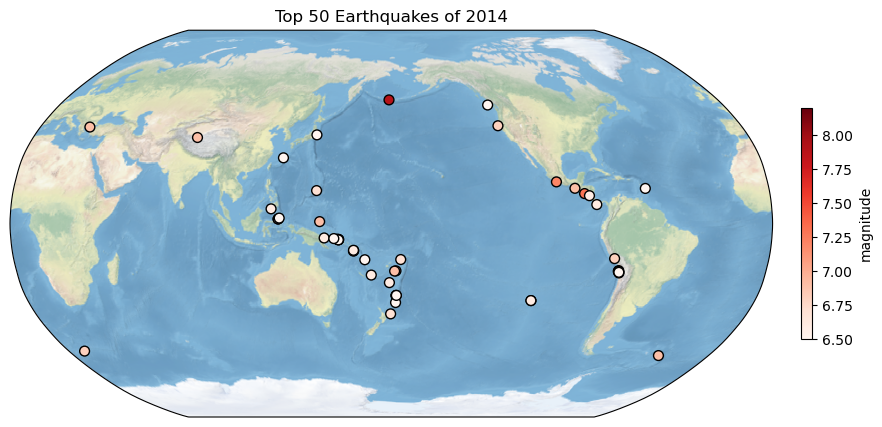

In [3]:
# Create figure, ax, and projection
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add map
ax.stock_img()

lon = earthquakes.longitude
lat = earthquakes.latitude
mag = earthquakes.mag

# Plot scatter
sc = ax.scatter(lon, lat, c=mag,
                s=50,
                cmap='Reds',
                edgecolors='k',
                transform=ccrs.PlateCarree())

# Add color bar
cbar = plt.colorbar(sc, ax=ax, shrink=0.3, pad=0.03, label='magnitude')

# Set title
ax.set_title('Top 50 Earthquakes of 2014')

plt.show()

# 2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) [website](https://disc.gsfc.nasa.gov/). Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in [Assignment 03](https://zhu-group.github.io/ese5023/Assignment_03.html#3_Explore_a_netCDF_dataset).

**2.1 [10 points]** Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (**1 point each**).

**2.2 [10 points]** Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (**1 point each**).

In [4]:
era5 = xr.open_dataset('era5.reanalysis.q.t.500.1000.2013.2022.global.nc',engine='netcdf4')
era5

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 6, time: 120)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 500 600 700 850 925 1000
  * time       (time) datetime64[ns] 2013-01-01 2013-02-01 ... 2022-12-01
Data variables:
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-20 20:07:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# ANS. 2.1

We can know more about `Mercator Projection` in the website [Coordinate reference systems (CRS): Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html).

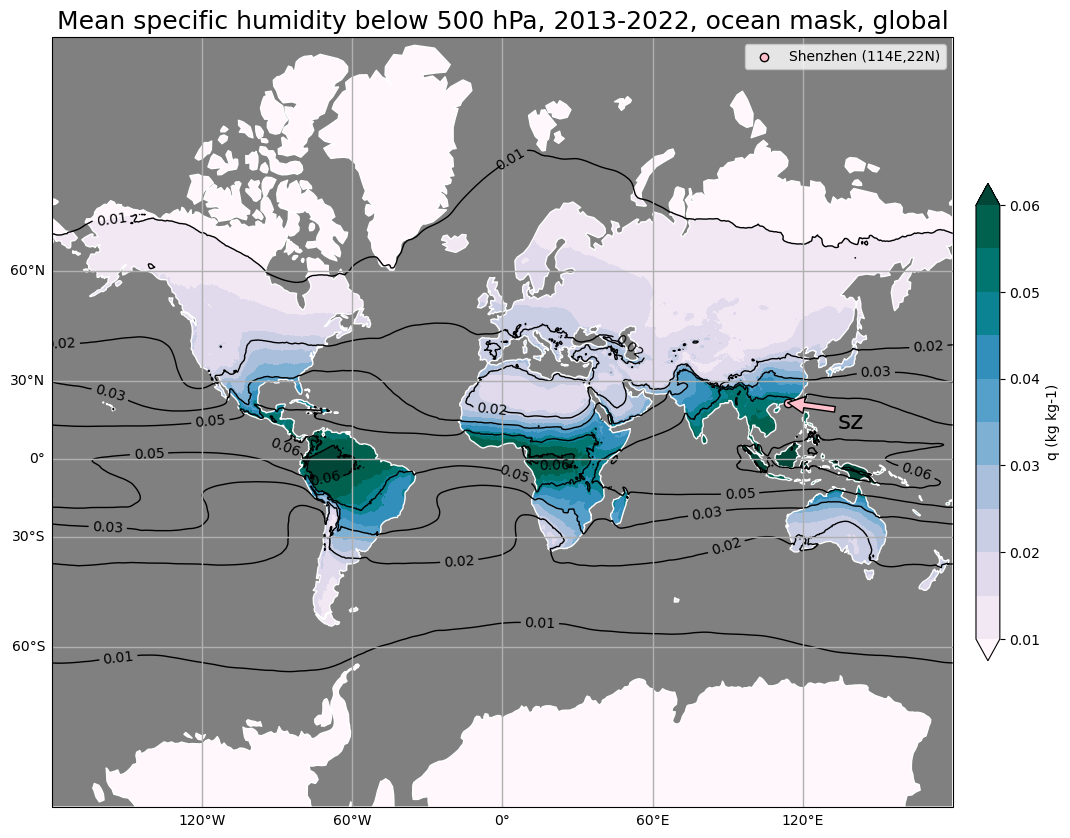

In [24]:
## Set map projection
mapcrs = ccrs.Mercator()

## Set data projection
datacrs = ccrs.PlateCarree()

## Create and define the size of a figure object 
plt.figure(figsize=(15, 10), dpi=100)

## Create an axes with projection style 
ax = plt.axes(projection=mapcrs)

# 1. Contourf-plot data and project
cf_level = np.linspace(0.01, 0.06, 11)

contour_fill = era5.q.sum('level').mean('time').plot.contourf(ax=ax, 
                                                              transform=datacrs,  
                                                              levels=cf_level,
                                                              cmap='PuBuGn',
                                                              add_colorbar=False)

# 2. x label and ticks
# 3. y label and ticks
ax.set_xlabel('Longitude') # Why I cannot show them on the plot ??????
ax.set_ylabel('Latitude')

# 5. Gridlines, turn off top and right labels (refer to Fangxiu Meng)
gl = ax.gridlines(draw_labels=True, lw=1)
gl.top_labels = False
gl.right_labels = False

# 7. Colorbar
cbar = plt.colorbar(contour_fill, ax=ax, shrink=0.62, pad=0.02, location='right')
cbar.set_label('q (kg kg-1)')

# 8. Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, 
                edgecolor='w', 
                facecolor='grey',
                lw=1,
                zorder=1)

# 9. Annotations
## Define the geographical coordinates of the point to annotate
lonSZ, latSZ = 114, 22

## Convert geographical coordinates to map projection coordinates
proj_x, proj_y = mapcrs.transform_point(lonSZ, latSZ, datacrs)
text_x, text_y = mapcrs.transform_point(lonSZ+20, latSZ-10, datacrs)

ax.annotate('sz',
            xy=(proj_x, proj_y),
            xytext=(text_x, text_y),
            fontsize=18,
            arrowprops=dict(facecolor='pink'))

# 6. Legend
scatter = plt.scatter(proj_x, proj_y, c='pink', edgecolors='k')
scatter.set_label('Shenzhen (114E,22N)')
plt.legend()

# 10. Text box
## Set the plot for q contour lines
cl_level = np.linspace(0.01, 0.06, 5)

contour_line = era5.q.sum('level').mean('time').plot.contour(ax=ax, 
                                                             transform=datacrs,  
                                                             levels=cl_level,
                                                             colors='k',
                                                             linewidths=1,
                                                             add_colorbar=False)

## Add labels to q contour lines
plt.clabel(contour_line, cl_level, inline=True, fontsize=10, fmt='%.2f')

# 4. Title
ax.set_title('Mean specific humidity below 500 hPa, 2013-2022, ocean mask, global',
              fontsize=18)


plt.show()

# ANS. 2.2

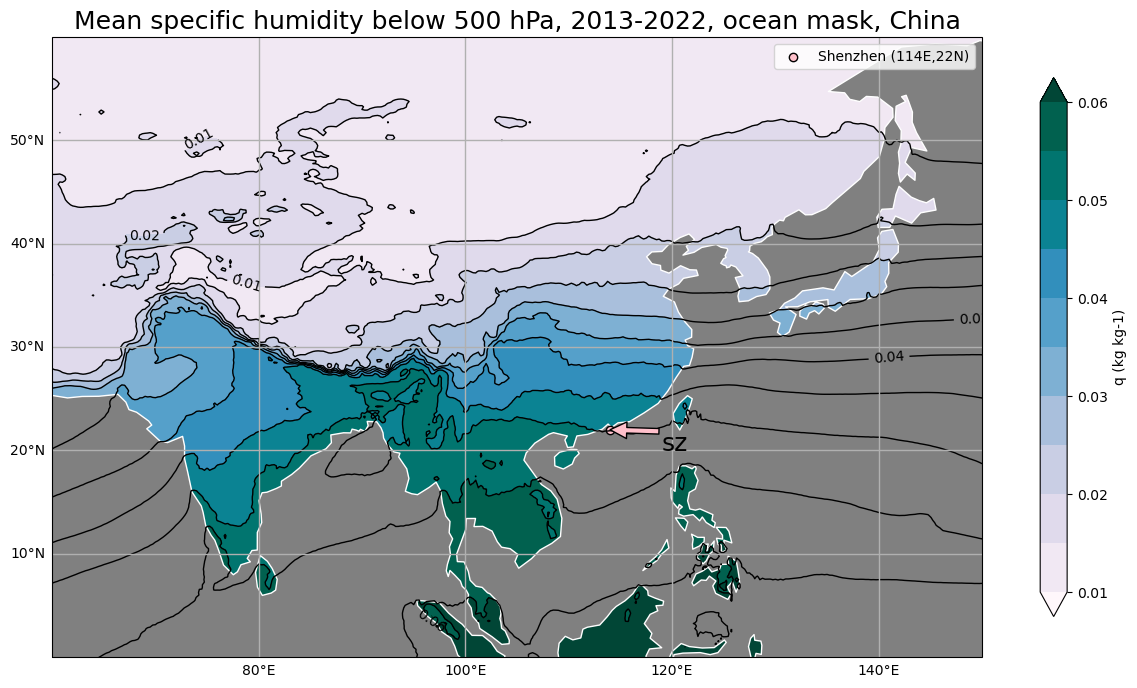

In [23]:
## Set map projection
mapcrs = ccrs.PlateCarree()

## Set data projection
datacrs = ccrs.PlateCarree()

## Create and define the size of a figure object 
plt.figure(figsize=(15, 10), dpi=100)

## Create an axes with a different projection style
ax = plt.axes(projection=mapcrs)

## Set extent
ax.set_extent([60, 150, 0, 60], crs=mapcrs)

# 1. Contourf-plot data and project
cf_level = np.linspace(0.01, 0.06, 11)

contour_fill = era5.q.sum('level').mean('time').plot.contourf(ax=ax, 
                                                              transform=datacrs,  
                                                              levels=cf_level,
                                                              cmap='PuBuGn',
                                                              add_colorbar=False)

# 2. x label and ticks
# 3. y label and ticks
# 5. Gridlines, turn off top and right labels (refer to Fangxiu Meng)
gl = ax.gridlines(draw_labels=True, lw=1)
gl.top_labels = False
gl.right_labels = False

# 7. Colorbar
cbar = plt.colorbar(contour_fill, ax=ax, shrink=0.7, pad=0.05, location='right')
cbar.set_label('q (kg kg-1)')

# 8. Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, 
               edgecolor='w', 
               facecolor='grey',
               lw=1,
               zorder=1)

# 9. Annotations
## Define the geographical coordinates of the point to annotate
lonSZ, latSZ = 114, 22

## Convert geographical coordinates to map projection coordinates
proj_x, proj_y = lonSZ, latSZ
text_x, text_y = lonSZ+5, latSZ-2

ax.annotate('sz',
            xy=(proj_x, proj_y),
            xytext=(text_x, text_y),
            fontsize=18,
            arrowprops=dict(facecolor='pink'))

# 6. Legend
scatter = plt.scatter(proj_x, proj_y, c='pink', edgecolors='k')
scatter.set_label('Shenzhen (114E,22N)')
plt.legend()

# 10. Text box
## Set the plot for q contour lines
cl_level = np.linspace(0.01, 0.06, 11)

contour_line = era5.q.sum('level').mean('time').plot.contour(ax=ax, 
                                                             transform=datacrs,
                                                             levels=cl_level,
                                                             colors='k',
                                                             linewidths=1,
                                                             add_colorbar=False)

## Add labels to q contour lines
plt.clabel(contour_line, cl_level, inline=True, fontsize=10, fmt='%.2f')

# 4. Title
ax.set_title('Mean specific humidity below 500 hPa, 2013-2022, ocean mask, China',
             fontsize=18)

plt.show()